Missing values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object
Duplicates in Customers: 0
Duplicates in Products: 0
Duplicates in Transactions: 0
  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence 

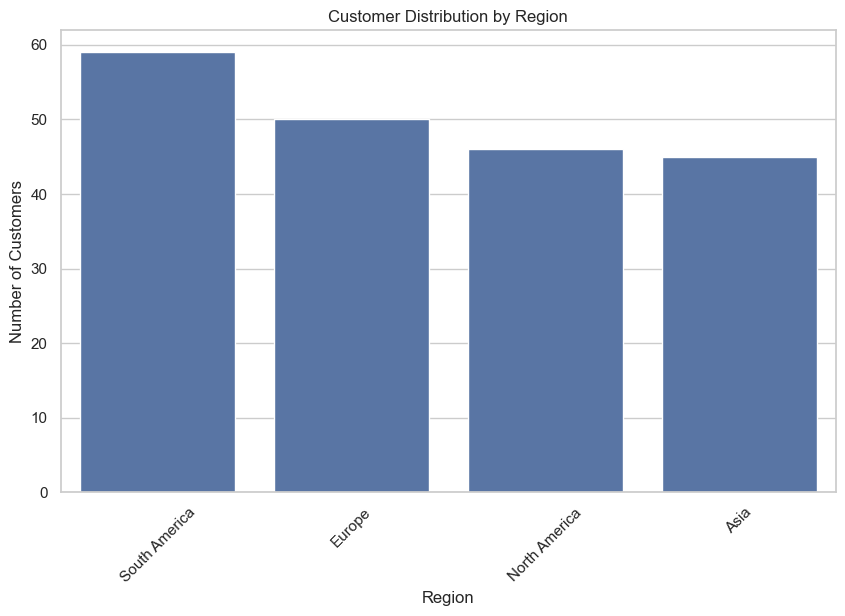

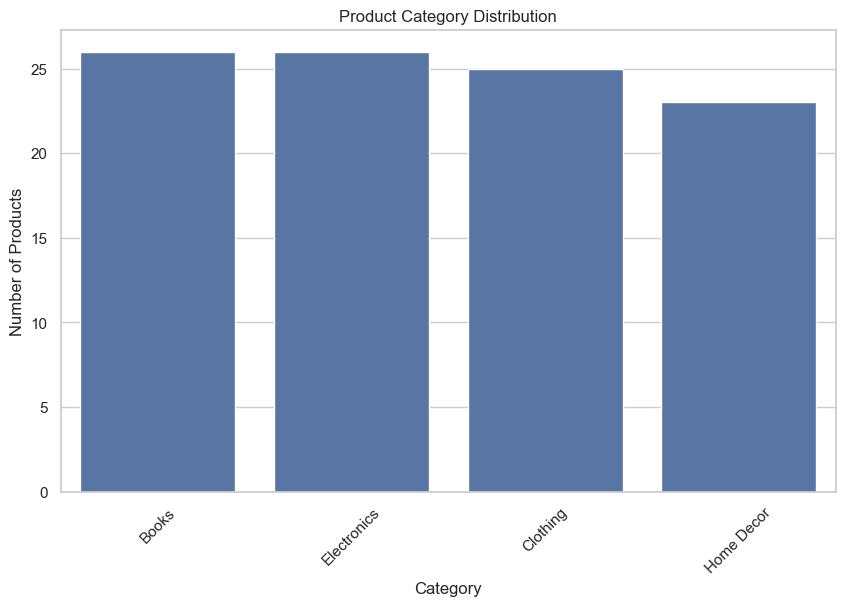

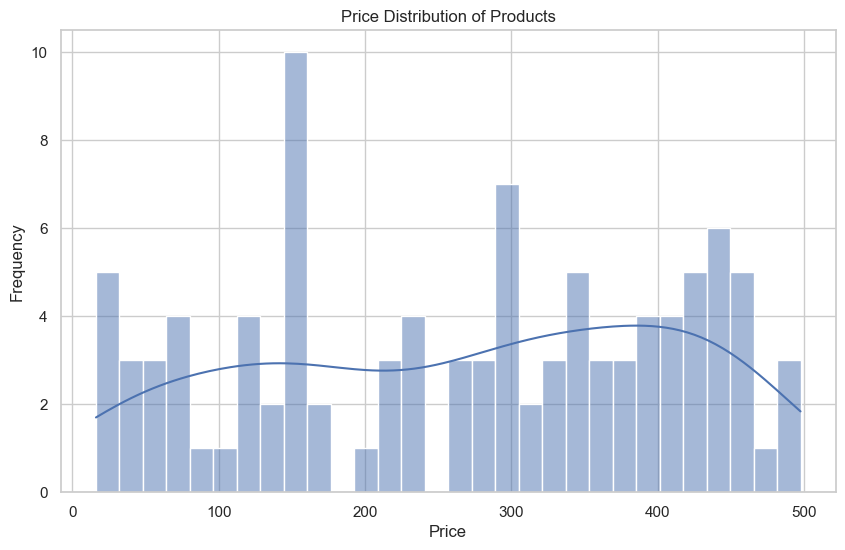

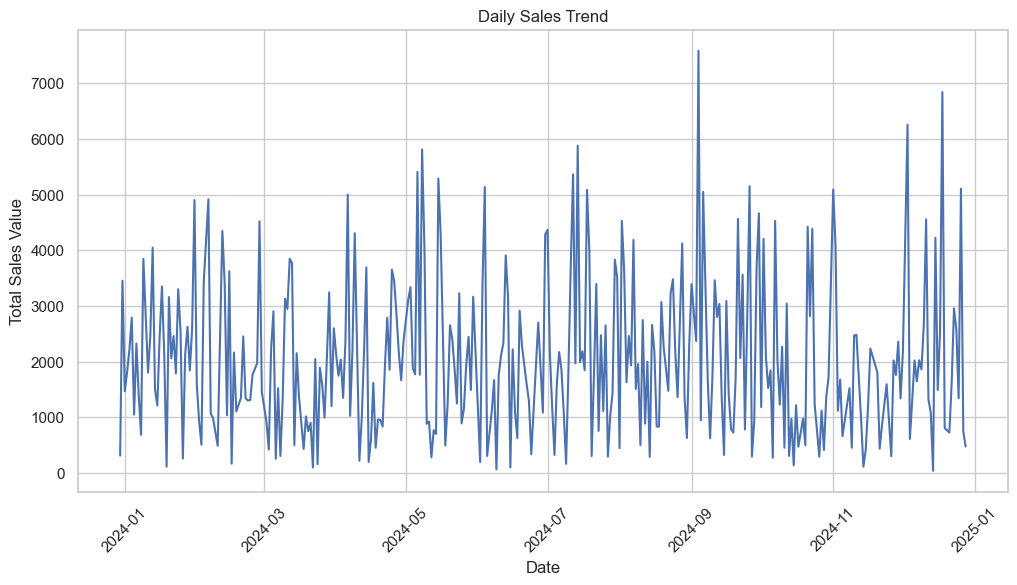

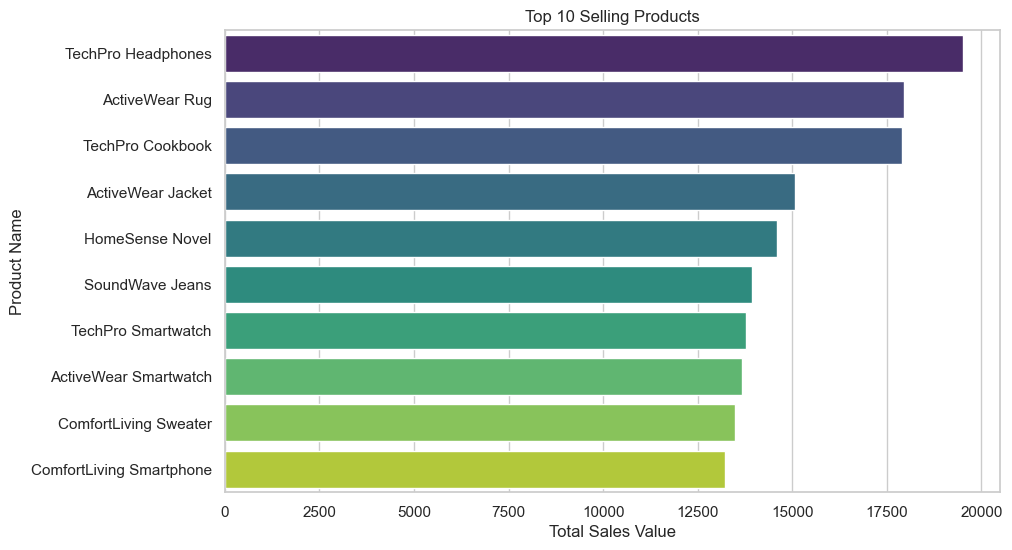

Average Transaction Value: $690.00


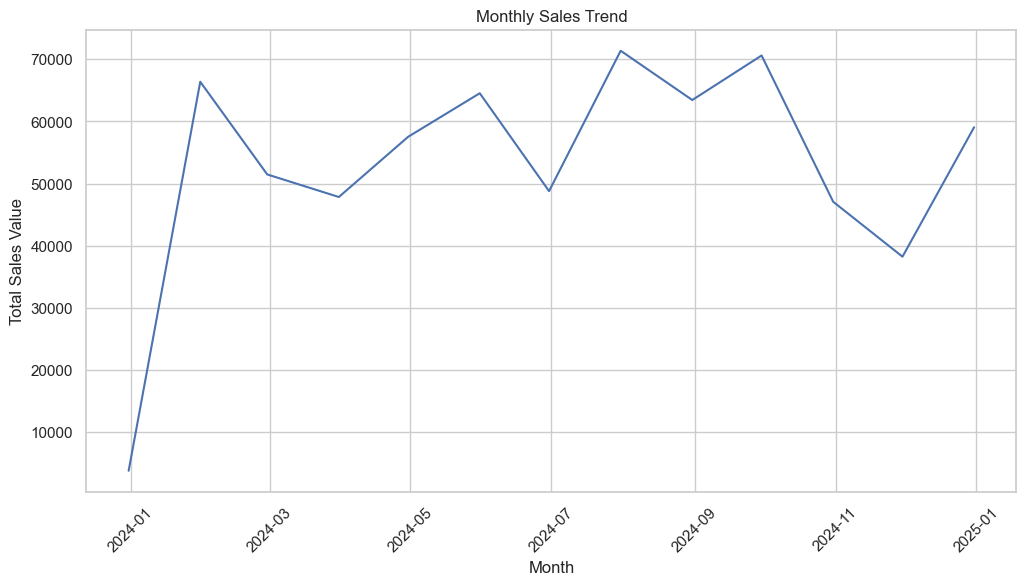

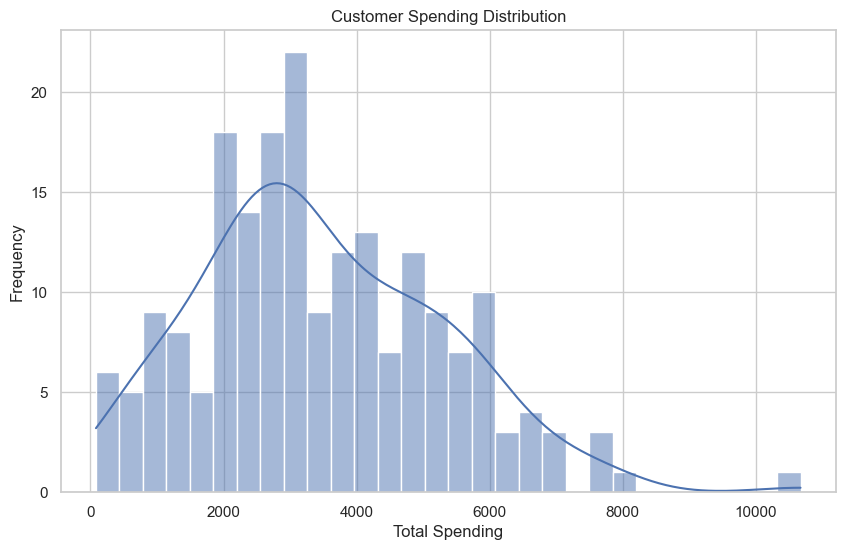

Product Performance by Category:
       Category  TotalValue
0        Books   192147.47
1     Clothing   166170.66
2  Electronics   180783.50
3   Home Decor   150893.93


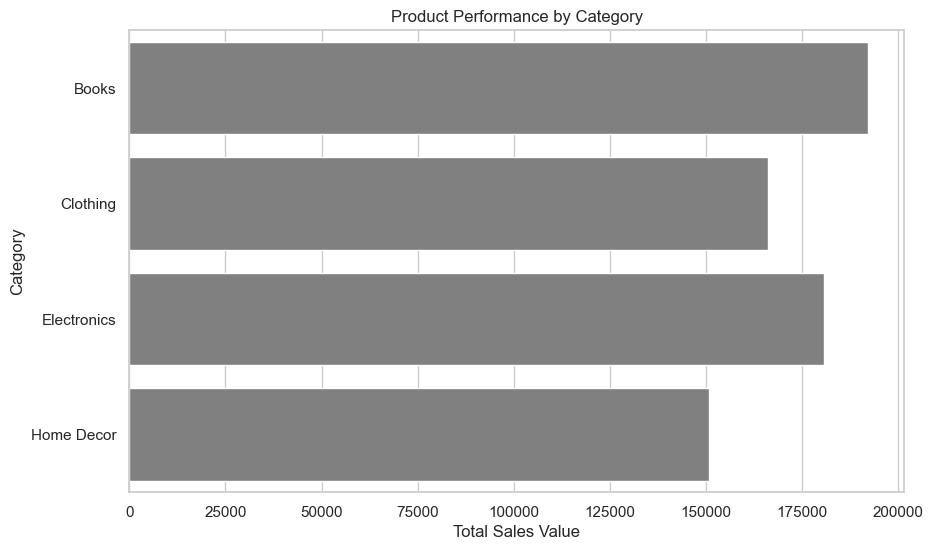

Correlation Matrix:
             Quantity  TotalValue     Price
Quantity    1.000000    0.609972 -0.009378
TotalValue  0.609972    1.000000  0.722714
Price      -0.009378    0.722714  1.000000


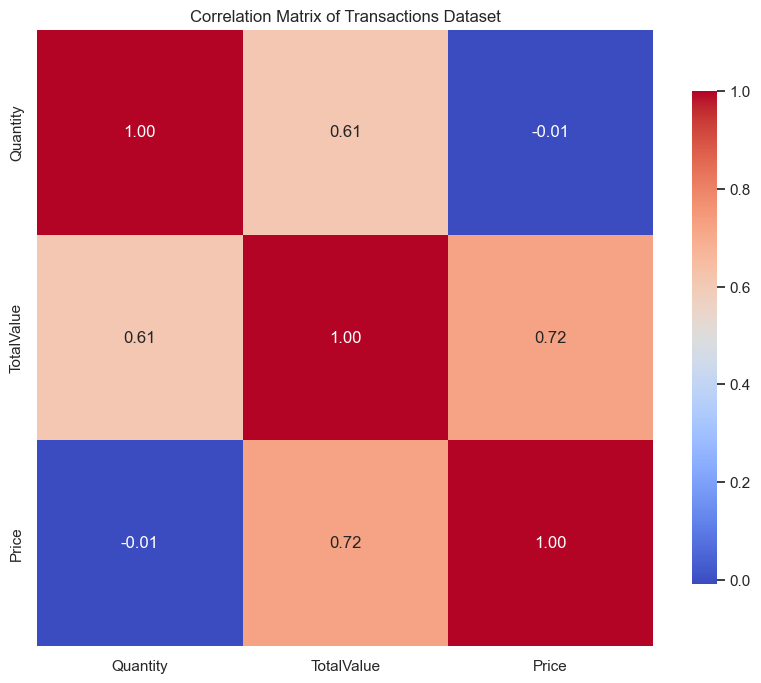

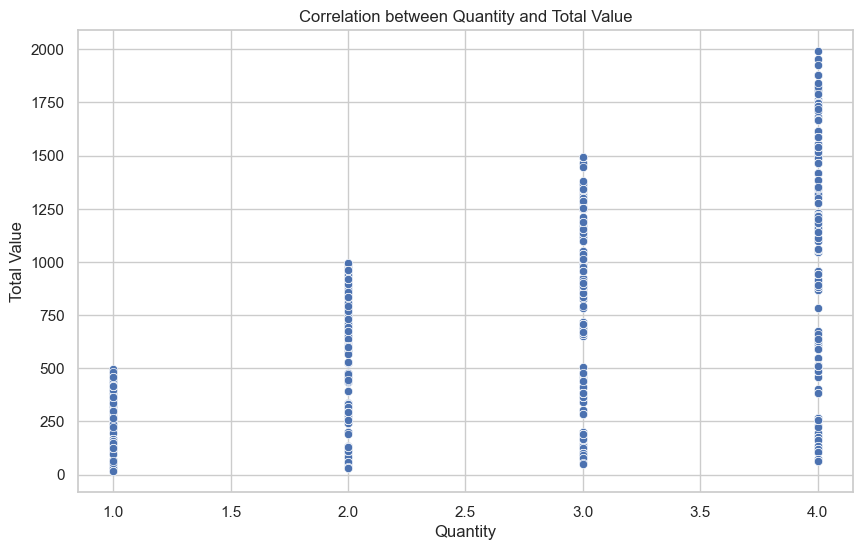

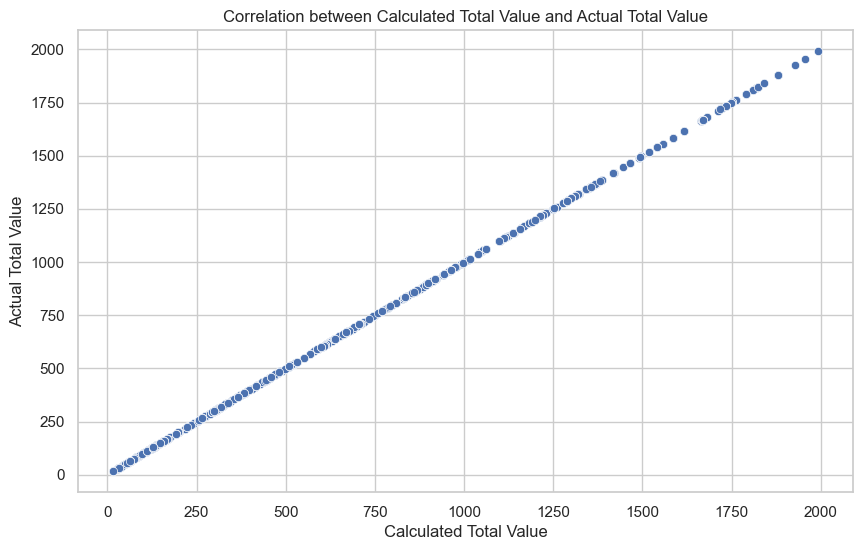

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers_df = pd.read_csv('C:/Users/Appu/OneDrive/Desktop/Data Analysis/Customers.csv')
products_df = pd.read_csv('C:/Users/Appu/OneDrive/Desktop/Data Analysis/Products.csv')
transactions_df = pd.read_csv('C:/Users/Appu/OneDrive/Desktop/Data Analysis/Transactions.csv')

# Check for missing values
missing_customers = customers_df.isnull().sum()
missing_products = products_df.isnull().sum()
missing_transactions = transactions_df.isnull().sum()

print("Missing values in Customers:\n", missing_customers)
print("Missing values in Products:\n", missing_products)
print("Missing values in Transactions:\n", missing_transactions)

# Check data types
print(customers_df.dtypes)
print(products_df.dtypes)
print(transactions_df.dtypes)

# Convert 'SignupDate' to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Remove duplicates
customers_df.drop_duplicates(inplace=True)
products_df.drop_duplicates(inplace=True)
transactions_df.drop_duplicates(inplace=True)

# Check for duplicates
print("Duplicates in Customers:", customers_df.duplicated().sum())
print("Duplicates in Products:", products_df.duplicated().sum())
print("Duplicates in Transactions:", transactions_df.duplicated().sum())

# Display cleaned dataframes
print(customers_df.head())
print(products_df.head())
print(transactions_df.head())

# Descriptive statistics for Customers
customers_desc = customers_df.describe(include='all')  # include='all' to get stats for categorical columns
print("Descriptive Statistics for Customers:\n", customers_desc)

# Descriptive statistics for Products
products_desc = products_df.describe(include='all')  # include='all' to get stats for categorical columns
print("Descriptive Statistics for Products:\n", products_desc)

# Descriptive statistics for Transactions
transactions_desc = transactions_df.describe(include='all')  # include='all' to get stats for categorical columns
print("Descriptive Statistics for Transactions:\n", transactions_desc)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Count of customers by region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers_df, x='Region', order=customers_df['Region'].value_counts().index)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# Count of products by category
plt.figure(figsize=(10, 6))
sns.countplot(data=products_df, x='Category', order=products_df['Category'].value_counts().index)
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

# Histogram of product prices
plt.figure(figsize=(10, 6))
sns.histplot(products_df['Price'], bins=30, kde=True)
plt.title('Price Distribution of Products')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Convert TransactionDate to datetime if not already done
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Group by date and sum total value
daily_sales = transactions_df.groupby(transactions_df['TransactionDate'].dt.date)['TotalValue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='TransactionDate', y='TotalValue')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()

# Group by product and sum total value
top_products = transactions_df.groupby('ProductID')['TotalValue'].sum().reset_index()
top_products = top_products.merge(products_df[['ProductID', 'ProductName']], on='ProductID')
top_products = top_products.sort_values(by='TotalValue', ascending=False).head(10)

plt.figure(figsize=(10, 6))
# Use a color map directly without palette
sns.barplot(data=top_products, x='TotalValue', y='ProductName', hue='ProductName', dodge=False, palette='viridis', legend=False)  # You can choose any color
plt.title('Top 10 Selling Products')
plt.xlabel('Total Sales Value')
plt.ylabel('Product Name')
plt.show()

# Average transaction value
average_transaction_value = transactions_df['TotalValue'].mean()
print(f"Average Transaction Value: ${average_transaction_value:.2f}")

# 4. Marketing Insights
# Monthly sales trend
monthly_sales = transactions_df.resample('ME', on='TransactionDate')['TotalValue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='TransactionDate', y='TotalValue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()

# 5. Customer Segmentation
# Segment customers based on total spending
customer_spending = transactions_df.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_spending = customer_spending.merge(customers_df[['CustomerID', 'Region']], on='CustomerID')

# Plot spending distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_spending['TotalValue'], bins=30, kde=True)
plt.title('Customer Spending Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.show()

# 6. Inventory Insights
# Product performance by category
product_performance = transactions_df.merge(products_df[['ProductID', 'Category']], on='ProductID')
category_performance = product_performance.groupby('Category')['TotalValue'].sum().reset_index()

print("Product Performance by Category:\n", category_performance)

# Plot product performance by category
plt.figure(figsize=(10, 6))
sns.barplot(data=category_performance, x='TotalValue', y='Category', color='gray')
plt.title('Product Performance by Category')
plt.xlabel('Total Sales Value')
plt.ylabel('Category')
plt.show()

# 1. Correlation Analysis on Transactions Dataset
# Calculate correlation matrix
numeric_columns = transactions_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = transactions_df[numeric_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# 2. Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Transactions Dataset')
plt.show()

# 3. Correlation between TotalValue and Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transactions_df, x='Quantity', y='TotalValue')
plt.title('Correlation between Quantity and Total Value')
plt.xlabel('Quantity')
plt.ylabel('Total Value')
plt.show()

# 4. Correlation between Price and TotalValue
# First, ensure that the price is calculated correctly in the transactions dataset
# Assuming TotalValue = Price * Quantity, we can check if this holds true
transactions_df['CalculatedTotalValue'] = transactions_df['Price'] * transactions_df['Quantity']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=transactions_df, x='CalculatedTotalValue', y='TotalValue')
plt.title('Correlation between Calculated Total Value and Actual Total Value')
plt.xlabel('Calculated Total Value')
plt.ylabel('Actual Total Value')
plt.show()